In [1]:
!nvidia-smi

Tue Apr 12 15:43:48 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   72C    P8    34W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [62]:
import pandas as pd
from sklearn import datasets
load_df = datasets.load_breast_cancer()

data = pd.DataFrame(load_df.data)
feature = pd.DataFrame(load_df.feature_names)
data.columns = feature[0]
target = pd.DataFrame(load_df.target)
target.columns=['target']
df = pd.concat([data, target], axis=1)
print(df.shape)
df.head()

(569, 31)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [63]:
print(load_df)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [4]:
print(target)

     target
0         0
1         0
2         0
3         0
4         0
..      ...
564       0
565       0
566       0
567       0
568       1

[569 rows x 1 columns]


In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import Image

import matplotlib.pyplot as plt
%matplotlib inline

# Scikit-Learn
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error as MSE

# Ensemble Learning
# from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

### 데이터마이닝 알고리즘
- 데이터 전처리
- 데이터 탐색
- 분류
- 군집
- 연관규칙
- 차원축소

### 반드시 포함할 내용
- 데이터 분석 과정 (문제 정의, 데이터 설명, 데이터 전처리, 데이터 탐색, 모델, 평가)

### 자율 선택
- 파이썬 패키지 및 모듈 종류

### 데이터 탐색

In [7]:
!pip install -U pandas-profiling

In [8]:
import pandas_profiling
pr = df.profile_report()
pr

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
!pip install dataprep

     |████████████████████████████████| 9.5 MB 9.6 MB/s 
     |████████████████████████████████| 965 kB 39.2 MB/s 
     |████████████████████████████████| 366 kB 43.0 MB/s 
     |████████████████████████████████| 1.5 MB 39.4 MB/s 
     |████████████████████████████████| 28.5 MB 1.7 MB/s 
     |████████████████████████████████| 1.1 MB 25.5 MB/s 
     |████████████████████████████████| 132 kB 38.2 MB/s 
     |████████████████████████████████| 1.0 MB 32.9 MB/s 
     |████████████████████████████████| 749 kB 22.4 MB/s 
     |████████████████████████████████| 95 kB 2.7 MB/s 
     |████████████████████████████████| 78 kB 1.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 50 kB 3.0 MB/s 
     |████████████████████████████████| 943 kB 35.1 MB/s 
     |████████████████████████████████| 271 kB 49.0 MB/s 
     |████████████████████████████████| 144 kB 49.6 MB/s 
     |█████


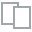
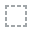
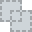
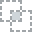
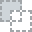
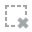
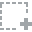
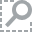
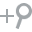
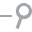
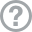
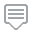
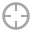
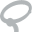
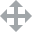
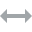
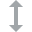
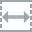
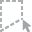
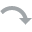
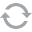
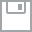
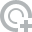
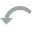
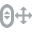
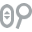
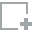
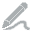
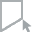
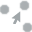
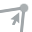
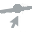

In [10]:
from dataprep.eda import *
plot(df)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [12]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [16]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

### 데이터 전처리
1. 문자 형태인 타깃 값을 숫자 형태로 변환해주는 것.
2. 필요 없는 Columns을 drop 시키는 것.

-> 데이터 전처리 할게 없다?

### 데이터 시각화

In [65]:
def pie_plot(feature):
    plt.figure(figsize=(12, 8))
    df[feature].value_counts().plot.pie(autopct='%1.1f%%')

In [66]:
def count_plot(feature):
    plt.figure(figsize=(12, 8))
    g1 = sns.countplot(data = df, x = feature)
    g1.set_title(f"{feature} Distribution")
    plt.show()

In [67]:
def bar_plot(feature):
    plt.figure(figsize=(12, 8))
    g2 = sns.barplot(x=df[feature],y=df['target'])
    plt.xticks(rotation=45)
    plt.show()

In [68]:
for i in df:
  print(i)

mean radius
mean texture
mean perimeter
mean area
mean smoothness
mean compactness
mean concavity
mean concave points
mean symmetry
mean fractal dimension
radius error
texture error
perimeter error
area error
smoothness error
compactness error
concavity error
concave points error
symmetry error
fractal dimension error
worst radius
worst texture
worst perimeter
worst area
worst smoothness
worst compactness
worst concavity
worst concave points
worst symmetry
worst fractal dimension
target


In [69]:
df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [70]:
import matplotlib.pyplot as plt
%matplotlib inline

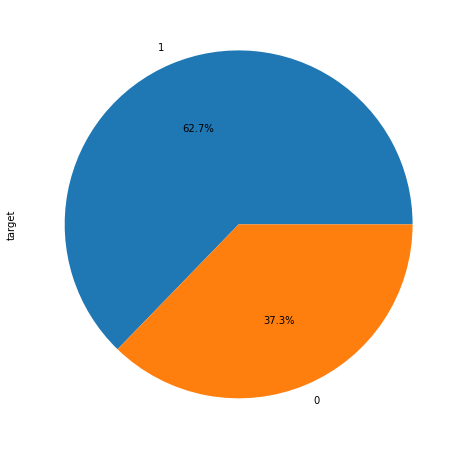

In [72]:
pie_plot('target')

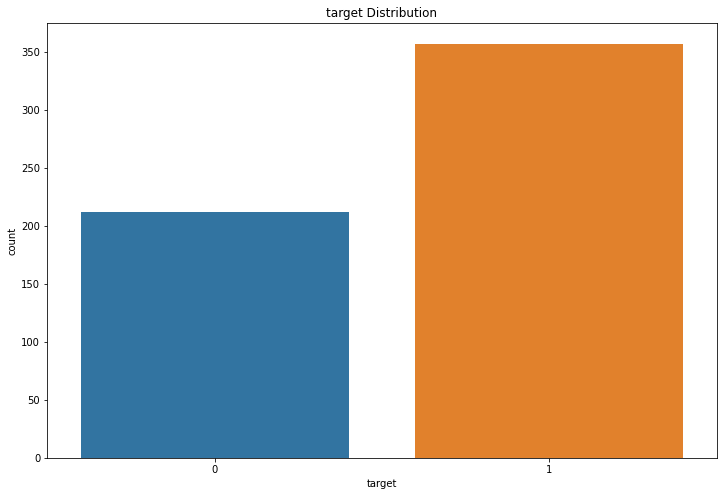

In [73]:
count_plot('target')

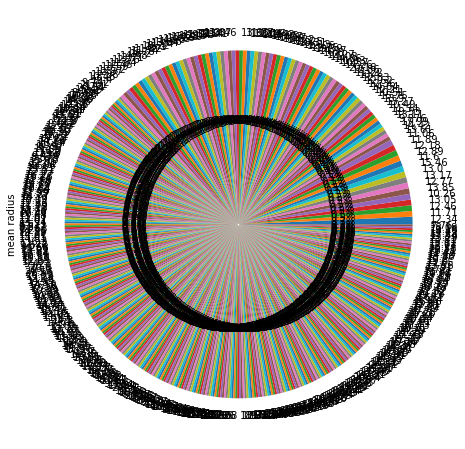

In [58]:
pie_plot('mean radius')

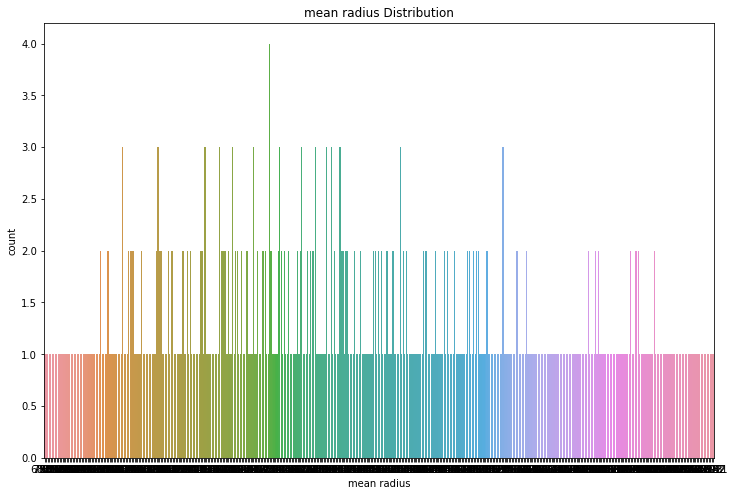

In [71]:
count_plot('mean radius')

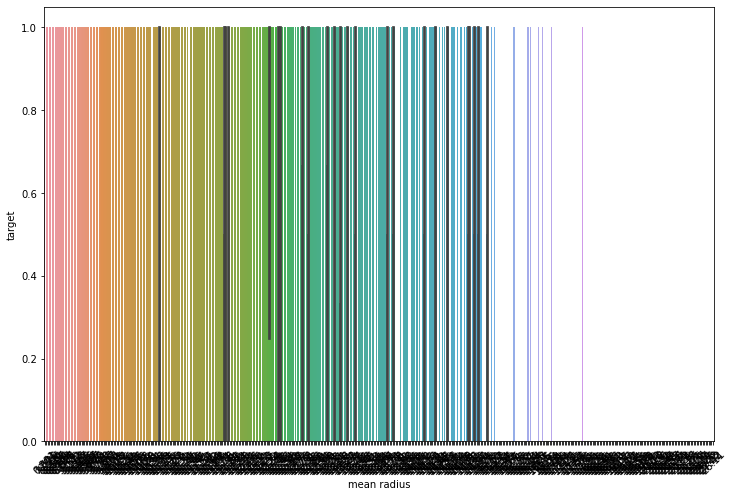

In [60]:
bar_plot('mean radius')

In [76]:
!pip show pandas_profiling

Name: pandas-profiling
Version: 3.1.0
Summary: Generate profile report for pandas DataFrame
Home-page: https://github.com/pandas-profiling/pandas-profiling
Author: Simon Brugman
Author-email: pandasprofiling@gmail.com
License: MIT
Location: /usr/local/lib/python3.7/dist-packages
Requires: markupsafe, tangled-up-in-unicode, jinja2, requests, joblib, multimethod, pydantic, tqdm, seaborn, scipy, phik, visions, htmlmin, matplotlib, pandas, missingno, PyYAML, numpy
Required-by: 


In [78]:
%pwd

'/content'

In [79]:
import pandas_profiling
pr = df.profile_report()
pr.to_file('./pr_report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### 수치형 변수간 상관관계 파악

In [80]:
num_cols_data_cor = df.corr()
num_cols_data_cor

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


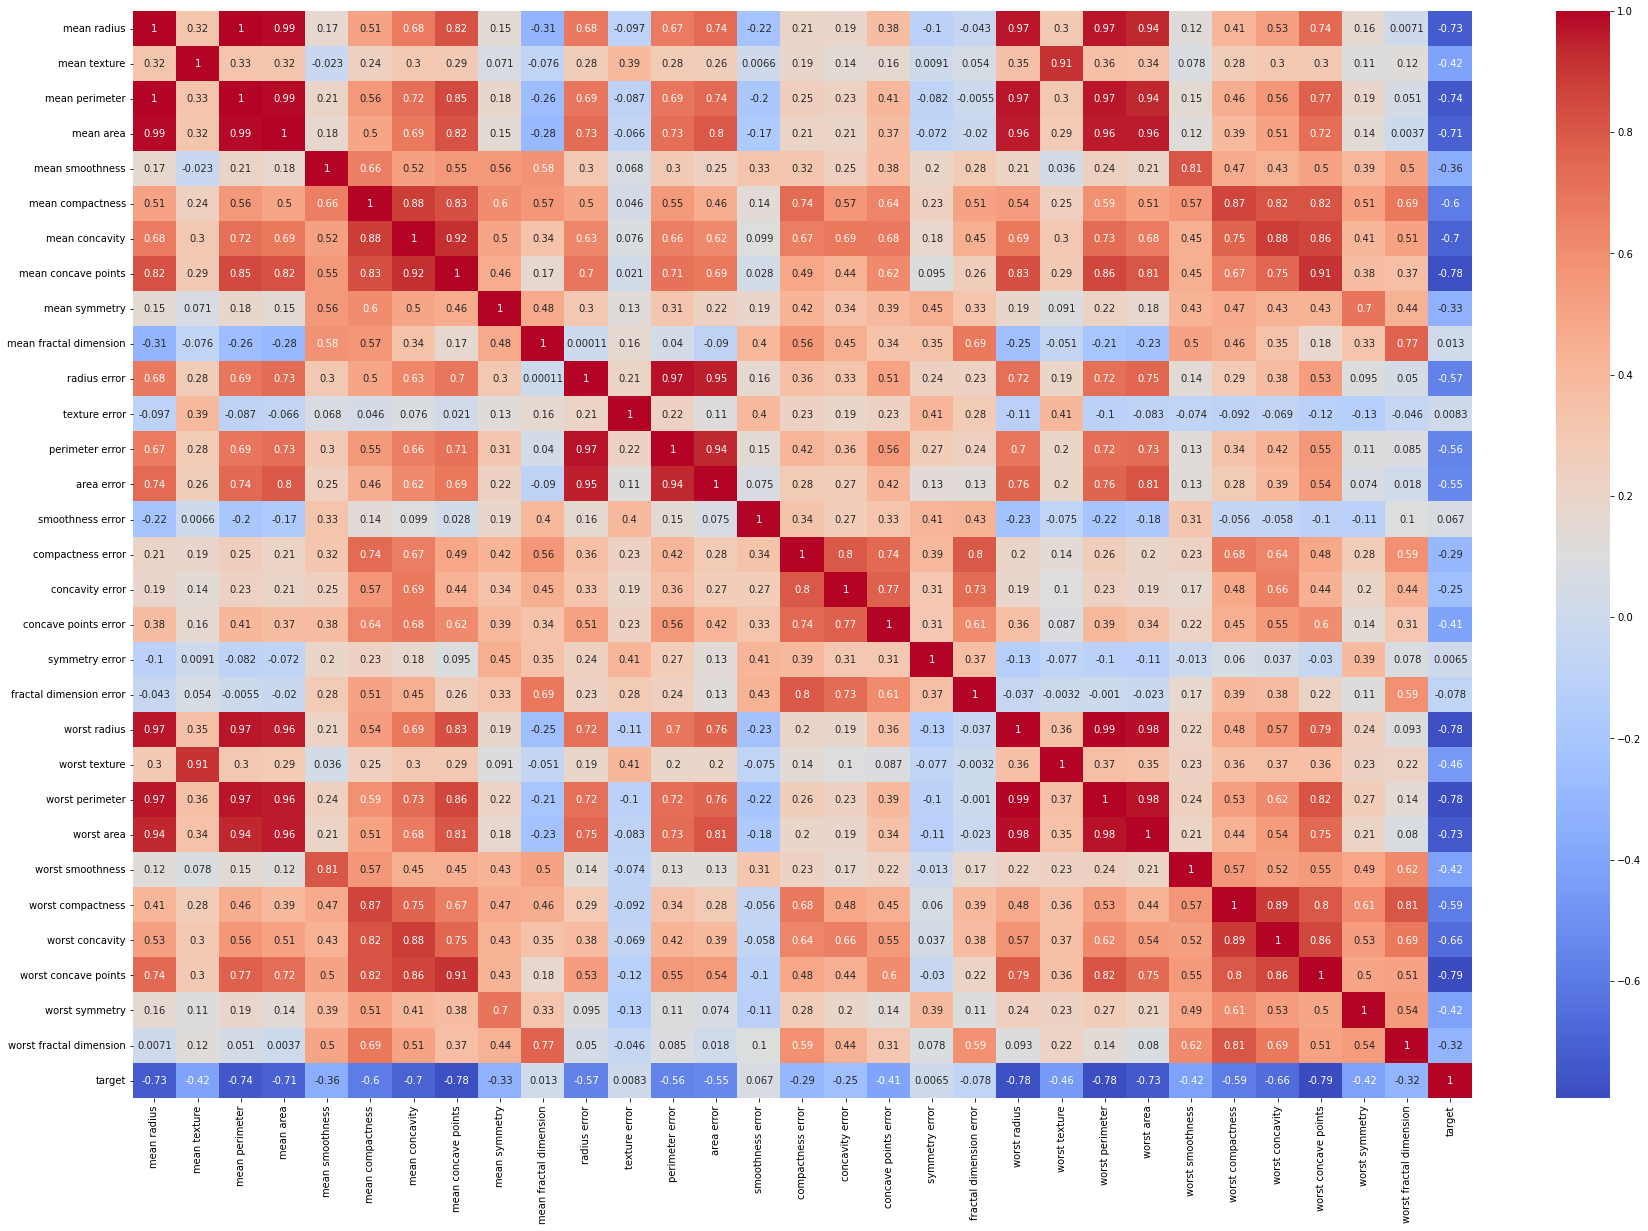

In [82]:
plt.figure(figsize=(30,20))
sns.heatmap(num_cols_data_cor,cmap='coolwarm', annot=True)

In [ ]:
sns.pairplot(df)
plt.show()

### 일단 모델을 돌려봅시다.

In [84]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_n = X.to_numpy()

In [85]:
print(X)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [87]:
# random_state는 모두 17로 고정

# startify=y를 부여하여 y값으로 층화해 임의표집하도록 함.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17, stratify=y)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(398, 30)
(171, 30)
(398,)
(171,)


#### K-Nearest Neighbors
1. x분포 데이터에 표준화를 하지 않았을 경우

In [88]:
# 학습데이터에 KNN을 적용

# KNeighborsClassifier
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

# 관측치 간의 거리는 minkowski 거리
# fit 함수를 이용하여 학습데이터에 학습을 시키고 있음.

# KNN - K-Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier

# 5개 근접한 이웃, 거리측정기준 : 유클리드
knn = KNeighborsClassifier(n_neighbors=5, p=2)

# Model Fitting 과정
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [89]:
# 학습 결과를 predict 함수를 이용하여 Train Data와 Test Data에 적용

# Train Data에서는 총 105개의 자료 중 2개가 잘못 분류됨
# Test Data에서는 총 45개의 자료 중 1개가 잘못 분류됨

y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

print('Misclassified training samples : %d' % (y_train != y_train_pred).sum())
print('Misclassified test samples : %d' % (y_test != y_test_pred).sum())

Misclassified training samples : 26
Misclassified test samples : 9


In [90]:
# accuracy_score 함수를 불러내서 정확도를 계산

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_test_pred))

0.9473684210526315


In [91]:
# confusion_matrix를 이용하여 참값과 예측값을 비교

from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_true = y_test, y_pred = y_test_pred)
print(conf)

# 행 : 참값 / 열 : 예측값
# setosa(y=0) : 모두 정확히 분류
# versicolor(y=1) : 모두 정확히 분류
# virginica(y=2) : 15개 중 1개가 versicolor로 오분류

[[ 57   7]
 [  2 105]]


2. x분포 데이터에 표준화를 했을 경우

In [92]:
# 표준화가 오히려 자료의 오분류를 늘리는 요인이 될 수 있다.

# KNN이 특성자료의 측정단위(scaling)에 의해 영향받지 않도록
# 특성변수 X의 표준화를 분석

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [93]:
# 표준화된 학습데이터에 KNN을 적용

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, p=2)
knn.fit(X_train_std, y_train)

KNeighborsClassifier()

In [94]:
y_train_pred = knn.predict(X_train_std)
y_test_pred = knn.predict(X_test_std)

print('Misclassified training samples : %d' % (y_train != y_train_pred).sum())
print('Misclassified test samples: %d' % (y_test != y_test_pred).sum())

# Train Data에서는 총 105개의 자료 중 4개가 잘못 분류됨
# Test Data에서는 총 45개의 자료 중 3개가 잘못 분류됨

### 표준화가 오히려 자료의 오분류를 늘리는 요인이 되었음.

Misclassified training samples : 8
Misclassified test samples: 5


In [95]:
# accuracy_score 함수를 불러내서 정확도를 계산할 수 있음.

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_test_pred))

0.9707602339181286


In [96]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_true=y_test, y_pred=y_test_pred)
print(conf)

[[ 59   5]
 [  0 107]]


3. 커널분포함수 추정 (Kernel Density Function)

In [98]:
# 관심 있는 특성변수의 클래스나 y의 평균을 계산할 때 거리에 비례하여 부여

# 커널함수 Kㅅ (x0, xi) : x0로부터의 거리에 비례하여 xi에 가중치(weight)를 부여하는 함수
# ㅅ : 가중치의 비중을 조절하는 모수

import matplotlib.pyplot as plt
import numpy as np

# IRIS Data의 첫 번째 특성변수만 선택하고 변수명을 제외한 값만 취한다.
xx = X['mean radius'].values
print(xx.shape)
xx = xx.T.reshape(-1, 1)
print(xx.shape)

(569,)
(569, 1)


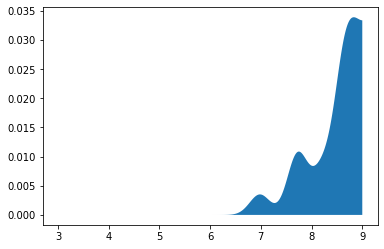

In [101]:
from sklearn.neighbors import KernelDensity
kd = KernelDensity(bandwidth = 0.2, kernel='gaussian')
kd.fit(xx)

# 3에서 9 사이를 1000개로 쪼갬
xx_d = np.linspace(3, 9, 1000)

# score_samples은 log probability를 계산한다.
logprob = kd.score_samples(xx_d.reshape(-1, 1))
plt.fill_between(xx_d, np.exp(logprob))

#### Logisitic Regression
- https://github.com/jason2133/statistical_machine_learning/blob/master/ch5/ch5_scikit_logistic_regression_iris.ipynb
- https://github.com/jason2133/statistical_machine_learning/blob/master/ch5/ch5_scikit_logitisc_regression_wine.ipynb

In [106]:
# Logistic Regression 적용

from sklearn.linear_model import LogisticRegression
Logit = LogisticRegression(C=1e2,
                          multi_class='ovr',
                          random_state=17,
                          max_iter=200
                          )

# C = 1 / λ

Logit.fit(X_train, y_train)

LogisticRegression(C=100.0, max_iter=200, multi_class='ovr', random_state=17)

In [107]:
y_train_pred = Logit.predict(X_train)
y_test_pred = Logit.predict(X_test)
y_test_pred_proba = Logit.predict_proba(X_test)
print(y_test_pred[:5])
print(y_test_pred_proba[:5])

[1 1 1 0 0]
[[2.45071521e-04 9.99754928e-01]
 [6.42142608e-05 9.99935786e-01]
 [1.75128360e-03 9.98248716e-01]
 [9.96480002e-01 3.51999824e-03]
 [1.00000000e+00 1.62910922e-21]]


In [108]:
# Accuracy Score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test, y_test_pred))

0.9623115577889447
0.9766081871345029


In [109]:
# Test Data의 정확도 행렬 Confusion Matrix

from sklearn.metrics import confusion_matrix

# Confusion Matrix
print(confusion_matrix(y_test, y_test_pred))

[[ 61   3]
 [  1 106]]


In [110]:
##### 규제화 방법을 넣을 수도 있다.
from sklearn.linear_model import LogisticRegression

# C = 1 / λ

# L2
# L2 with C = 10
lr2_10 = LogisticRegression(penalty='l2', C=10.0)

# L2 with C = 1
lr2_1 = LogisticRegression(penalty='l2', C=1.0)

# L2 with C = 0.1
lr2_0_1 = LogisticRegression(penalty='l2', C=0.1)

# L1
# L1 with C = 10
lr1_10 = LogisticRegression(penalty='l1', C=10.0, solver='liblinear')

# L1 with C = 1
lr1_1 = LogisticRegression(penalty='l1', C=1.0, solver='liblinear')

# L1 with C = 0.1
lr1_0_1 = LogisticRegression(penalty='l1', C=0.1, solver='liblinear')

##### 규제화 방법 (L2 or L1)과 규제강도(λ)를 바꿔가며 Accuracy Score 계산

In [111]:
lr2_10.fit(X_train, y_train)
print('Training accuracy with L2 and λ=10:', lr2_10.score(X_train, y_train))
print('Test accuracy with L2 and λ=10:', lr2_10.score(X_test, y_test))

Training accuracy with L2 and λ=10: 0.9547738693467337
Test accuracy with L2 and λ=10: 0.9473684210526315


In [112]:
lr2_1.fit(X_train, y_train)
print('Training accuracy with L2 and λ=1:', lr2_1.score(X_train, y_train))
print('Test accuracy with L2 and λ=1:', lr2_1.score(X_test, y_test))

Training accuracy with L2 and λ=1: 0.9472361809045227
Test accuracy with L2 and λ=1: 0.9532163742690059


In [113]:
lr2_0_1.fit(X_train, y_train)
print('Training accuracy with L2 and λ=0.1:', lr2_0_1.score(X_train, y_train))
print('Test accuracy with L2 and λ=0.1:', lr2_0_1.score(X_test, y_test))

Training accuracy with L2 and λ=0.1: 0.9296482412060302
Test accuracy with L2 and λ=0.1: 0.9649122807017544


In [114]:
lr1_10.fit(X_train, y_train)
print('Training accuracy with L1 and λ=10:', lr1_10.score(X_train, y_train))
print('Test accuracy with L1 and λ=10:', lr1_10.score(X_test, y_test))

Training accuracy with L1 and λ=10: 0.9748743718592965
Test accuracy with L1 and λ=10: 0.9707602339181286


In [115]:
lr1_1.fit(X_train, y_train)
print('Training accuracy with L1 and λ=1:', lr1_1.score(X_train, y_train))
print('Test accuracy with L1 and λ=1:', lr1_1.score(X_test, y_test))

Training accuracy with L1 and λ=1: 0.957286432160804
Test accuracy with L1 and λ=1: 0.9649122807017544


In [116]:
lr1_0_1.fit(X_train, y_train)
print('Training accuracy with L1 and λ=0.1:', lr1_0_1.score(X_train, y_train))
print('Test accuracy with L1 and λ=0.1:', lr1_0_1.score(X_test, y_test))

Training accuracy with L1 and λ=0.1: 0.9296482412060302
Test accuracy with L1 and λ=0.1: 0.9473684210526315


In [117]:
print(lr1_10.intercept_)

[19.07233772]


In [118]:
print(lr1_10.coef_)

[[ 1.44357231e+00  2.13011360e-01 -1.78879719e-01  7.36045654e-03
   0.00000000e+00  0.00000000e+00 -3.26730339e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  2.42515892e+00
  -2.19166711e-01 -1.34272048e-01  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   5.68697034e-01 -5.72188249e-01  2.25543058e-02 -2.30564436e-02
  -1.58462932e+01  0.00000000e+00 -3.02596858e+00 -2.35704159e+01
  -3.63850896e+00  0.00000000e+00]]


## 끝판왕 등장
- https://github.com/jason2133/statistical_machine_learning/blob/master/ch18/chap18_1.ipynb

In [120]:
!pip install catboost

     |████████████████████████████████| 76.6 MB 1.4 MB/s 


In [125]:
!pip3 install scikit-learn

In [127]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMRegressor,LGBMClassifier
from catboost import CatBoostRegressor, CatBoostClassifier
from sklearn.svm import SVC,SVR
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
# from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score
# from sklearn.ensemble import VotingClassifier,VotingRegressor,StackingClassifier,StackingRegressor

In [132]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(398, 30)
(171, 30)
(398,)
(171,)


In [135]:
print(X.shape)
print(y.shape)
pd.DataFrame(y).value_counts()

(569, 30)
(569,)


target
1         357
0         212
dtype: int64

In [136]:
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=5)

In [137]:
def classification_model(model):
    scores = cross_val_score(model, X, y, cv=kfold)
    return scores.mean()

In [138]:
classification_model(XGBClassifier())

0.9648657040832168

In [139]:
classification_model(XGBClassifier(booster='gblinear'))

0.8910572892408011

In [140]:
classification_model(XGBClassifier(booster='dart'))

0.9648657040832168

In [143]:
# classification_model(RandomForestClassifier(random_state=17))/

In [144]:
classification_model(LogisticRegression(max_iter=10000))

0.9525694767893184

In [145]:
classification_model(LinearDiscriminantAnalysis())

0.9595870206489675

In [146]:
classification_model(QuadraticDiscriminantAnalysis())

0.9578171091445427

In [147]:
classification_model(SVR())

0.729144868409201

In [148]:
classification_model(SVR(kernel='rbf'))

0.729144868409201

In [149]:
classification_model(LGBMClassifier())

0.9666200900481291

In [150]:
classification_model(CatBoostClassifier())

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
4:	learn: 0.6328968	total: 86ms	remaining: 17.1s
5:	learn: 0.6242350	total: 93.7ms	remaining: 15.5s
6:	learn: 0.6117754	total: 101ms	remaining: 14.4s
7:	learn: 0.6011510	total: 109ms	remaining: 13.5s
8:	learn: 0.5885447	total: 117ms	remaining: 12.8s
9:	learn: 0.5792051	total: 124ms	remaining: 12.3s
10:	learn: 0.5699259	total: 132ms	remaining: 11.9s
11:	learn: 0.5598931	total: 140ms	remaining: 11.5s
12:	learn: 0.5507869	total: 147ms	remaining: 11.2s
13:	learn: 0.5416312	total: 155ms	remaining: 11s
14:	learn: 0.5329652	total: 163ms	remaining: 10.7s
15:	learn: 0.5234724	total: 171ms	remaining: 10.5s
16:	learn: 0.5136017	total: 178ms	remaining: 10.3s
17:	learn: 0.5050865	total: 193ms	remaining: 10.5s
18:	learn: 0.4960666	total: 209ms	remaining: 10.8s
19:	learn: 0.4893882	total: 217ms	remaining: 10.6s
20:	learn: 0.4829923	total: 224ms	remaining: 10.5s
21:	learn: 0.4744425	total: 232ms	remaining: 10.3s
22:	learn: 0.4653028	total: 240ms	remaining: 10.2s
23:

0.9718987734823784

### 여기서부터 다시

In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

import warnings
warnings.filterwarnings(action='ignore')
%matplotlib inline

# Scikit-Learn
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error as MSE

# Ensemble Learning
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [154]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_n = X.to_numpy()

In [155]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17, stratify=y)

In [156]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(398, 30)
(171, 30)
(398,)
(171,)


- https://github.com/jason2133/statistical_machine_learning/blob/master/ch17/chap17_1.ipynb

In [159]:
# from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

In [160]:
import time
start = time.time()

df.info()

end = time.time()
elapsed = end - start

print('\nRun Time: ' + str(elapsed) + ' seconds.')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [161]:
gbr = GradientBoostingClassifier(n_estimators=100, max_depth=2, random_state=17)
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)
score = accuracy_score(y_pred, y_test)
print('Score: ' + str(score))

NameError: ignored

In [162]:
from xgboost import XGBClassifier

# Instantiate the XGBRegressor, xg_reg
xg_reg = XGBClassifier(n_estimators=100, max_depth=2, random_state=2)

# Fit xg_reg to training set
xg_reg.fit(X_train, y_train)

# Predict labels of test set, y_pred
y_pred = xg_reg.predict(X_test)

score = accuracy_score(y_pred, y_test)

print('Score: ' + str(score))

Score: 0.9590643274853801


In [163]:
from lightgbm import LGBMClassifier

lgb_reg = LGBMClassifier(n_estimators=100, max_depth=2, random_state=2)
lgb_reg.fit(X_train, y_train)

# Predict labels of test set, y_pred
y_pred = lgb_reg.predict(X_test)
score = accuracy_score(y_pred, y_test)

print('Score: ' + str(score))

Score: 0.9649122807017544


In [164]:
from catboost import CatBoostClassifier

cat_reg = CatBoostClassifier(n_estimators=100, max_depth=2, random_state=2)
cat_reg.fit(X_train, y_train)

# Predict labels of test set, y_pred
y_pred = cat_reg.predict(X_test)

score = accuracy_score(y_pred, y_test)

print('Score: ' + str(score))

Learning rate set to 0.057423
0:	learn: 0.6257534	total: 2.22ms	remaining: 219ms
1:	learn: 0.5679755	total: 3.88ms	remaining: 190ms
2:	learn: 0.5170029	total: 5.55ms	remaining: 179ms
3:	learn: 0.4548707	total: 7.23ms	remaining: 173ms
4:	learn: 0.4080032	total: 8.87ms	remaining: 168ms
5:	learn: 0.3792898	total: 10.5ms	remaining: 165ms
6:	learn: 0.3591552	total: 12.2ms	remaining: 162ms
7:	learn: 0.3361290	total: 13.9ms	remaining: 160ms
8:	learn: 0.3035709	total: 15.6ms	remaining: 157ms
9:	learn: 0.2772909	total: 17.2ms	remaining: 155ms
10:	learn: 0.2612772	total: 18.9ms	remaining: 153ms
11:	learn: 0.2450896	total: 20.6ms	remaining: 151ms
12:	learn: 0.2288928	total: 22.2ms	remaining: 149ms
13:	learn: 0.2171012	total: 23.9ms	remaining: 147ms
14:	learn: 0.2053101	total: 25.5ms	remaining: 145ms
15:	learn: 0.2005349	total: 27.2ms	remaining: 143ms
16:	learn: 0.1916883	total: 29ms	remaining: 142ms
17:	learn: 0.1859826	total: 30.7ms	remaining: 140ms
18:	learn: 0.1808037	total: 32.3ms	remaining: 